# <span style="color:blue">  Esercitazione 9</span>

## Esercizio 9.1

In questa esercitazione viene risolto il Traveling Salesman Problem (TSL), ovvero il problema del commesso viaggiatore. Questo problema chiede quale sia il più breve percorso possibile che collega una serie di città, di modo che ogni città sia visitata sempre e solo una volta e che il percorso si concluda nella stessa città di partenza. Risolviamo questo problema con un algoritmo genetico.

Per implementare l'algoritmo genetico dobbiamo codificare il problema di modo che sia trattabile numericamente e che possa sfruttare le potenzialità di un algoritmo genetico. A questo proposito, l'algoritmo è stato pensato nel seguente modo:
1. Ogni possibile percorso è scrivibile come una sequenza di interi, dove ogni intero rappresenta una particolare città visitata. Sia 0 la città di partenza. Qualunque sequenza deve soddisfare un certo numero di vincoli dati dalla descrizione del problema. Ogni sequenza deve iniziare con 0, deve avere lunghezza pari al numero di città da visitare e presentare ogni intero non ripetuto da 0 al numero di città escluso. A tal fine, si è scritta una funzione di controllo che verifica che ogni sequenza iniziale o generata successivamente soddisfi questi vincoli.
2. Deve essere implementata una funzione costo che data una sequenza di interi corrispondente ad una successione di città calcoli la distanza nell'ordine fra queste, tornando alla città di partenza. Si può utilizzare indifferentemente una qualunque metrica, per esempio $L^{(1)}$
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
o $L^{(2)}$
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
dove $\vec{x}_i$ è la posizione dell'$i$-esima città (in questa esercitazione abbiamo usato la seconda metrica). Questa funzione viene chiamata per calcolare la lunghezza del percorso di ciascuna sequenza della popolazione ed è fondamentale per determinare il miglior percorso.
3. Viene generata una popolazione iniziale di "individui", dove con individuo intendiamo una certa sequenza di interi rappresentate un possibile percorso. In genere si raccomanda di partire da una popolazione iniziale di $N^2$ individui se $N$ è il numero di città. Tuttavia, anche un numero inferiore è adeguato.
4. Data la popolazione iniziale bisogna implementare l'algoritmo genetico vero e proprio che porta la popolazione ad evolvere in funzione delle successive generazioni. A tal scopo si sono scritte le seguenti funzioni:
    * selezione di due individui e crossover: la funzione di selezione deve ottenere due individui casuali, andando a selezionare preferibilmente due individui nel "gruppo dei migliori". Ad esempio, ordinando la popolazione in ordine crescente rispetto alla funzione costo, un algoritmo di selezione possibile è
    $$
    j= int(M \times r^p)+1
    $$
dove $M$ è la dimensione della popolazione, $r$ un numero casuale generato fra 0 e 1 e $p$ un opportuno coefficiente. Nel nostro caso, avendo ordinato la popolazione in maniera crescente, deve essere scelto $p>1$ affinché la selezione prediliga gli individui collocati all'inizio della popolazione (nel nostro caso $p=10$). In questo modo il crossover predilige l'incrocio tra due buoni candidati, permettendo alla generazione successiva generata di conservare le stesse buone qualità. La funzione di crossover taglia le due sequenze casualmente in uno stesso punto, conserva le rispettive prime metà e ricostruisce le seconda metà leggendo gli interi nell'ordine dall'altra sequenza. Il crossover viene chiamato con alta probabilità, nel nostro caso si è scelto $P_{cross}=0.8$;
    * mutazioni genetiche: si sono scritte quattro funzioni che, chiamate su una sequenza, eseguono la permutazione di due città casuali, la permutazione di due gruppi di città contigue, l'inversione dell'ordine di un gruppo di città o la traslazione rigida di un gruppo di città. Queste funzioni sono chiamate con bassa probabilità, nel nostro caso si è scelto di porle tutte uguali a $P_{mut}=0.01$.
5. Infine, deve essere programmato l'algoritmo genetico usando le funzioni descritte precedentemente: si selezionano due individui, si esegue il crossover con data probabilità, si generano due nuove sequenze e su queste si chiamano le mutazioni sui singoli indici, ciascuna con la propria probabilità. Le due nuove sequenze rientreranno nella futura generazione. Iterando sul numero di individui della popolazione si genera un nuovo set di individui che costituiscono la nuova generazione. Questa deve essere poi ordinata in base alla funzione costo prima di procedere con una successiva chiamata dell'algoritmo genetico.

Se il numero totale di generazioni (ovvero di chiamate dell'algoritmo genetico) è sufficiente, la simulazione giunge a convergenza e la soluzione è data dalla prima sequenza dell'ultima generazione della popolazione.

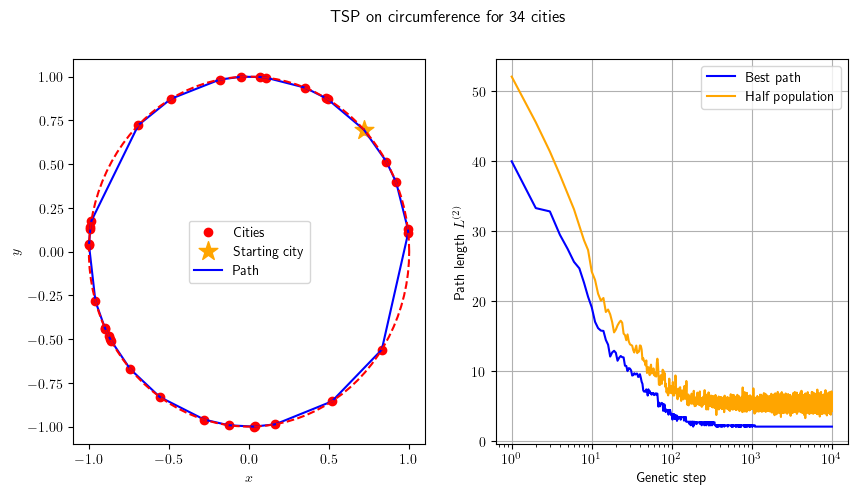

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Città e rispettive coordinate
cities = np.loadtxt("cities_circum.out", skiprows=1)
x = cities[:, 1]
y = cities[:, 2]

# Estraggo ultima sequenza tra tutte
sequences = np.loadtxt("sequences_circum.out", skiprows=1)
path = sequences[-1].astype(int)

# Ordine delle città data sequenza ottimale
x_ordine = [x[i] for i in path]
y_ordine = [y[i] for i in path]

# Chiusura percorso con città di partenza
x_ordine.append(x_ordine[0])
y_ordine.append(y_ordine[0])

# Circonferenza di raggio unitario
theta = np.linspace(0, 2 * np.pi, 100)
x_circum = np.cos(theta)
y_circum = np.sin(theta)

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('TSP on circumference for 34 cities')

# Grafico di sinistra: percorso tra le città
ax1 = fig.add_subplot(121)

ax1.scatter(x, y, c='r', label='Cities') # Scatter plot per le città
ax1.scatter(x[0], y[0], c='orange', s=200, marker='*', label='Starting city') # Città di partenza
ax1.plot(x_ordine, y_ordine, color='blue', label='Path') # Plot percorso
ax1.plot(x_circum, y_circum, linestyle='dashed', c='r') # Plot circonferenza

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.legend()

# Funzione costo del cammino ottimale e della media su metà popolazione
cost_function = np.loadtxt("costfunction_circum.out", skiprows=1)
path_length = cost_function[:, 0]
mean_path_length = cost_function[:, 1]
num_step = np.arange(1, path_length.size + 1)

# Grafico di destra: andamento funzione costo
ax2 = fig.add_subplot(122)

ax2.plot(num_step, path_length, c='b', label='Best path') # Funzione costo per cammino ottimale
ax2.plot(num_step, mean_path_length, c='orange', label='Half population') # Funzione costo media su metà popolazione

ax2.set_xlabel('Genetic step')
ax2.set_ylabel('Path length $L^{(2)}$')
ax2.set_xscale('log')
ax2.grid(True)
ax2.legend()

plt.show()

L'algortimo descritto è stato applicato per risolvere il TSP per 34 città disposte casualmente su una circonferenza. La popolazione iniziale è costituita da 300 sequenze e l'algoritmo genetico è stato chiamato $10^4$ volte (anche se come si vede la convergenza è raggiunta già intorno a $10^3$). Come parametri si sono posti $p=10$, $P_{cross}=0.8$ e $P_{mut}=0.01$.

Intuitivamente, la soluzione attesa è quella per cui le città sono visitate nello stesso ordine con cui compaiono sulla circonferenza (indifferentemente in senso orario o antiorario). Questo è quanto si osserva nel grafico di sinistra. Nel grafico di destra si mostra la lunghezza del percorso del miglior candidato in funzione dello step genetico (in blu) e della media sulla prima metà della popolazione (in arancione).

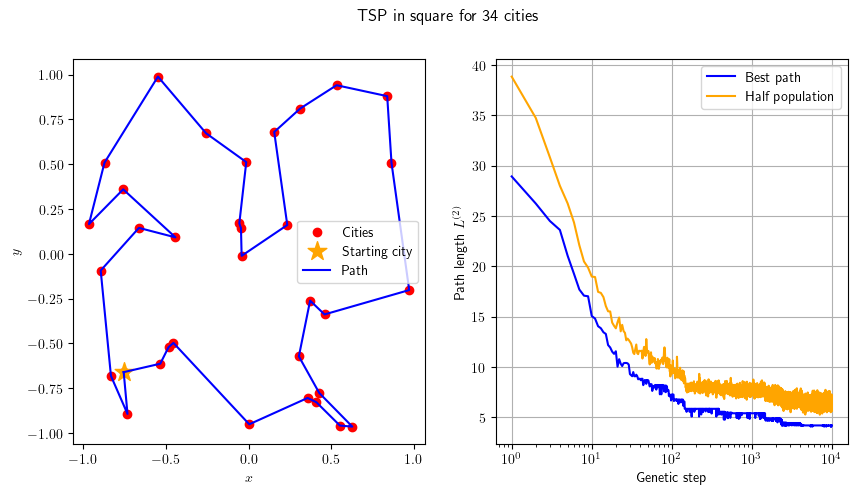

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Città e rispettive coordinate
cities = np.loadtxt("cities_square.out", skiprows=1)
x = cities[:, 1]
y = cities[:, 2]

# Estraggo ultima sequenza tra tutte
sequences = np.loadtxt("sequences_square.out", skiprows=1)
path = sequences[-1].astype(int)

# Ordine delle città data sequenza ottimale
x_ordine = [x[i] for i in path]
y_ordine = [y[i] for i in path]

# Chiusura percorso con città di partenza
x_ordine.append(x_ordine[0])
y_ordine.append(y_ordine[0])

# Plot grafico
fig = plt.figure(figsize=(10, 5))
plt.rcParams['text.usetex'] = True
fig.suptitle('TSP in square for 34 cities')

# Grafico di sinistra: percorso tra le città
ax1 = fig.add_subplot(121)

ax1.scatter(x, y, c='r', label='Cities') # Scatter plot per le città
ax1.scatter(x[0], y[0], c='orange', s=200, marker='*', label='Starting city') # Città di partenza
ax1.plot(x_ordine, y_ordine, color='blue', label='Path') # Plot percorso

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.legend()

# Funzione costo del cammino ottimale e della media su metà popolazione
cost_function = np.loadtxt("costfunction_square.out", skiprows=1)
path_length = cost_function[:, 0]
mean_path_length = cost_function[:, 1]
num_step = np.arange(1, path_length.size + 1)

# Grafico di destra: andamento funzione costo
ax2 = fig.add_subplot(122)

ax2.plot(num_step, path_length, c='b', label='Best path') # Funzione costo per cammino ottimale
ax2.plot(num_step, mean_path_length, c='orange', label='Half population') # Funzione costo media su metà popolazione

ax2.set_xlabel('Genetic step')
ax2.set_ylabel('Path length $L^{(2)}$')
ax2.set_xscale('log')
ax2.grid(True)
ax2.legend()

plt.show()

Quanto fatto precedentemente nel caso delle città sulla circonferenza è stato ripetuto anche per 34 città disposte in maniera casuale all'interno di un quadrato. I parametri utilizzati sono i medesimi. In questo caso era meno ovvio intuire quale fosse l'ordine ottimale. Ci si può convincere del fatto che l'algoritmo è converso alla soluzione ottimale dal fatto che il cammino non presenta intersezioni.